In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Import Dataset

In [2]:
customers = pd.read_csv('customer.csv', sep =';')
product = pd.read_csv('product.csv', sep =';')
store = pd.read_csv('store.csv', sep =';')
transaction = pd.read_csv('transaction.csv', sep =';')

In [3]:
customers.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [4]:
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [5]:
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [6]:
transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [7]:
print("Customer Shape: ",customers.shape)
print("Product Shape: ",product.shape)
print("Store Shape: ",store.shape)
print("Transaction Shape: ",transaction.shape)

Customer Shape:  (447, 5)
Product Shape:  (10, 3)
Store Shape:  (14, 6)
Transaction Shape:  (5020, 8)


Merge dataset

In [8]:
merged_df = pd.merge(transaction, product,on='ProductID', suffixes = ('_customers', '_product'))
merged_df = pd.merge(merged_df, store, on='StoreID')

final_merged_df = pd.merge(merged_df, customers, on='CustomerID')
final_merged_df= final_merged_df.drop(['Price_customers'], axis = 1)

final_merged_df.sample(5)

,TransactionID,CustomerID,Date,ProductID,Qty,TotalAmount,StoreID,Product Name,Price_product,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
2216,TR77214,392,25/07/2022,P10,3,45000,9,Cheese Stick,15000,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",45,0,Married,"19,68"
3715,TR12201,352,27/08/2022,P8,3,48000,13,Oat,16000,Buana,Buana,General Trade,"-1,26916","116,825264",69,0,Single,"6,15"
402,TR45231,234,30/04/2022,P7,2,18800,8,Coffee Candy,9400,Sinar Harapan,Harapan Baru,General Trade,"5,54829","95,323753",61,1,Married,"10,86"
4372,TR88291,84,14/02/2022,P3,5,37500,9,Crackers,7500,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",54,0,Married,"18,12"
4898,TR20454,266,05/07/2022,P10,3,45000,6,Cheese Stick,15000,Lingga,Lingga,Modern Trade,"-5,135399","119,42379",72,1,Married,"4,72"


Rename all column to lowercase and drop irrelevant column in table

In [9]:
for column in final_merged_df.columns:
    final_merged_df.rename(columns ={column: column.lower()}, inplace = True)
final_merged_df.rename(columns = {'marital status': 'marital_status'}, inplace = True)
final_merged_df.rename(columns = {'product name': 'product_name'}, inplace = True)
final_merged_df.drop(['latitude', 'longitude'], axis=1)
final_merged_df.sample(5)

# change data type
df = final_merged_df
df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y', infer_datetime_format=True)

df.sample(5)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5548\2885939086.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date'] = pd.to_datetime(df['date'],format='%d/%m/%Y', infer_datetime_format=True)


,transactionid,customerid,date,productid,qty,totalamount,storeid,product_name,price_product,storename,groupstore,type,latitude,longitude,age,gender,marital_status,income
4591,TR82004,204,2022-02-18,P7,2,18800,9,Coffee Candy,9400,Lingga,Lingga,Modern Trade,"-3,654703","128,190643",53,0,Married,"9,46"
4264,TR91249,191,2022-08-14,P10,1,15000,14,Cheese Stick,15000,Priangan,Priangan,Modern Trade,"-5,45","105,26667",35,1,Married,"8,3"
2870,TR19361,348,2022-05-29,P4,3,36000,7,Potato Chip,12000,Buana Indah,Buana,General Trade,"3,316694","114,590111",29,1,Married,"4,64"
4325,TR2519,213,2022-12-14,P3,6,45000,11,Crackers,7500,Sinar Harapan,Prestasi,General Trade,"0,533505","101,447403",24,1,Single,"5,72"
4841,TR65888,318,2022-10-29,P5,4,16800,2,Thai Tea,4200,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238",18,0,Single,"3,64"


Check for null values

In [10]:
df.isna().sum()

transactionid      0
customerid         0
date               0
productid          0
qty                0
totalamount        0
storeid            0
product_name       0
price_product      0
storename          0
groupstore         0
type               0
latitude           0
longitude          0
age                0
gender             0
marital_status    44
income             0
dtype: int64

Fill null values with mode

In [11]:
fill_marital_status = df['marital_status'].mode()
df['marital_status'].fillna(fill_marital_status, inplace = True)

Create dataframe for clustering

In [12]:
cluster_df = df.groupby('customerid').agg({'transactionid' : 'count',
                                          'qty' : 'sum',
                                          'totalamount' : 'sum'})
cluster_df.head()

,transactionid,qty,totalamount
customerid,,,
1,17,60,623300
2,13,57,392300
3,15,56,446200
4,10,46,302500
5,7,27,268600


Check for outlier

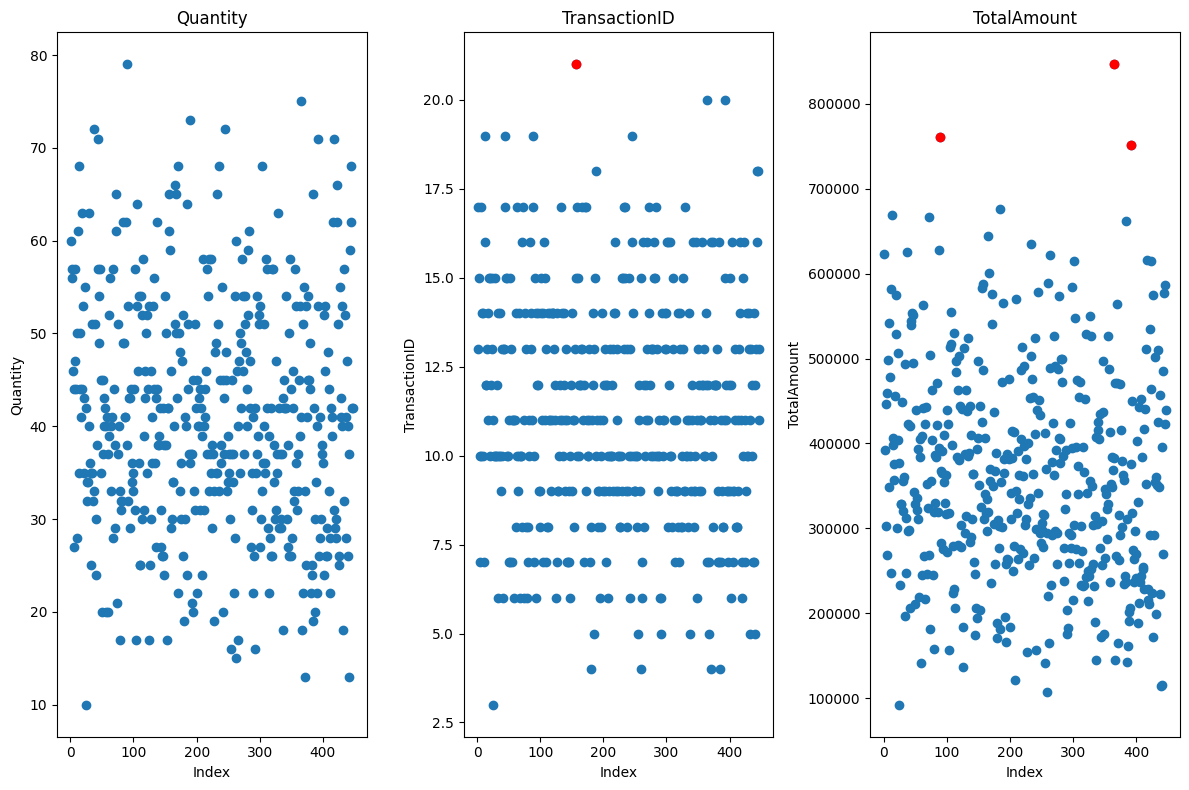

In [13]:
# Calculate Z-score for each data point
numeric_cols = ['transactionid', 'qty', 'totalamount']
z_scores = np.abs((cluster_df[numeric_cols] - cluster_df[numeric_cols].mean()) / cluster_df[numeric_cols].std())

# Define a threshold for outliers
outlier_threshold = 3

# Identify outliers
outliers = cluster_df[z_scores > outlier_threshold]

# Plot the data
plt.figure(figsize=(12, 8))

# Plot for 'qty'
plt.subplot(1, 3, 1)
plt.scatter(cluster_df.index, cluster_df['qty'], label='qty')
plt.scatter(outliers.index, outliers['qty'], color='red', label='Outliers (qty)')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.title('Quantity')

# Plot for 'transactionid'
plt.subplot(1, 3, 2)
plt.scatter(cluster_df.index, cluster_df['transactionid'], label='transactionid')
plt.scatter(outliers.index, outliers['transactionid'], color='red', label='Outliers (transactionid)')
plt.xlabel('Index')
plt.ylabel('TransactionID')
plt.title('TransactionID')

# Plot for 'totalamount'
plt.subplot(1, 3, 3)
plt.scatter(cluster_df.index, cluster_df['totalamount'], label='totalamount')
plt.scatter(outliers.index, outliers['totalamount'], color='red', label='Outliers (totalamount)')
plt.xlabel('Index')
plt.ylabel('TotalAmount')
plt.title('TotalAmount')

plt.tight_layout()
plt.show()

Perpare Elbow Method

In [14]:
# Standardize the Data
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the data in cluster_df
cluster_df_std = scaler.fit_transform(cluster_df.values)

# Convert the standardized data back to a DataFrame
cluster_df_std = pd.DataFrame(cluster_df_std, columns=cluster_df.columns)

# check the cluster_df_std data
cluster_df_std.head()

,transactionid,qty,totalamount
0,1.779816,1.496527,2.094768
1,0.545884,1.261093,0.239269
2,1.162850,1.182615,0.672218
3,-0.379565,0.397833,-0.482047
4,-1.305014,-1.093251,-0.754347


In [15]:
# check null values
cluster_df_std.isnull().sum()

transactionid    0
qty              0
totalamount      0
dtype: int64

Plot the elbow method to get best number of clusters

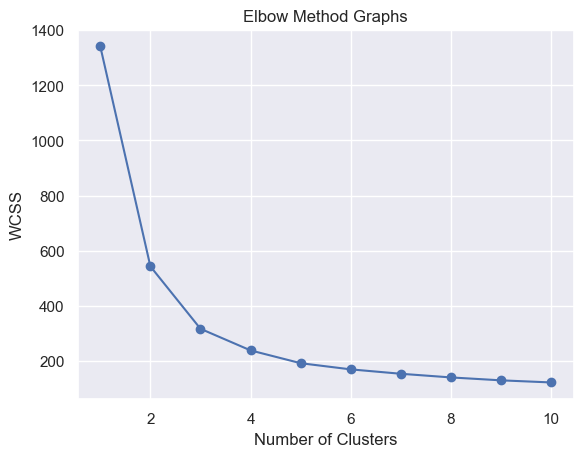

In [16]:
wcss = [] # wcss is Within Cluster of Sum Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init = 10)
    kmeans.fit(cluster_df_std.values)
    wcss.append(kmeans.inertia_)

# plot the elbow method
sns.set()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method Graphs')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the graph above, best cluster for K-Means is at 3

KMeans Model Segmentation

In [17]:
# make KMeans with n = 3
kmeans_3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0, n_init = 10)
clusters = kmeans_3.fit_predict(cluster_df_std)
cluster_df['cluster'] = clusters

# Display the DataFrame with the cluster labels
cluster_df.head()

,transactionid,qty,totalamount,cluster
customerid,,,,
1,17,60,623300,0
2,13,57,392300,0
3,15,56,446200,0
4,10,46,302500,1
5,7,27,268600,2


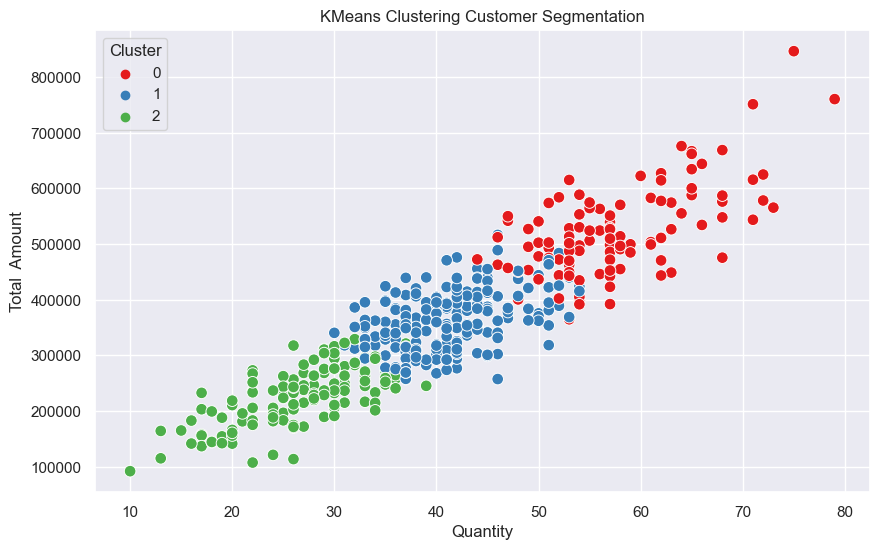

In [18]:
# Convert 'cluster' column to categorical data type
cluster_df['cluster'] = cluster_df['cluster'].astype('category')

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='qty', y='totalamount', data=cluster_df, hue='cluster', palette='Set1', s=70)
plt.xlabel('Quantity')
plt.ylabel('Total  Amount')
plt.title('KMeans Clustering Customer Segmentation')
plt.legend(title='Cluster')
plt.show()

In [19]:
# create clustering dataframe
rfm_df = df.groupby('customerid').agg({'transactionid' : 'count',
                                          'qty' : 'sum',
                                          'totalamount' : 'sum',
                                       'date' : 'min'})
# check rfm dataframe info
rfm_df.info()
rfm_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 447 entries, 1 to 447
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  447 non-null    int64         
 1   qty            447 non-null    int64         
 2   totalamount    447 non-null    int64         
 3   date           447 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 17.5 KB


,transactionid,qty,totalamount,date
customerid,,,,
1,17,60,623300,2022-02-23
2,13,57,392300,2022-01-15
3,15,56,446200,2022-01-25
4,10,46,302500,2022-02-18
5,7,27,268600,2022-02-10


RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

Reference:
https://www.investopedia.com/terms/r/rfm-recency-frequency-monetary-value.asp

In [20]:
#Rencency
latest_date = rfm_df['date'].max()
rfm_df['Recency'] = latest_date - rfm_df['date']

#Frequency
frequency_df = rfm_df.groupby('customerid')['transactionid'].unique().reset_index()
frequency_df = frequency_df.rename(columns={'transactionid': 'Frequency'})
rfm_df = rfm_df.merge(frequency_df, on='customerid')
rfm_df['Frequency'] = rfm_df['Frequency'].astype(int)

#Monetary
monetary_df = rfm_df.groupby('customerid')['totalamount'].sum().reset_index()
monetary_df = monetary_df.rename(columns={'totalamount':'Monetary'})
rfm_df = rfm_df.merge(monetary_df, on='customerid')
rfm_df['cluster'] = clusters
rfm_df['cluster'] = rfm_df['cluster'].astype('category')

In [21]:
# Group by cluster and calculate average RFM values for each cluster
rfm_analysis = rfm_df.groupby('cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'customerid': 'count'
}).reset_index()

# Rename column
rfm_analysis = rfm_analysis.rename(columns={
    'Recency': 'Average Recency',
    'Frequency': 'Average Frequency',
    'Monetary': 'Average Monetary',
    'customerid': 'Number of Customers'
})

# Convert timedeltas to numeric values in days
rfm_analysis['Average Recency'] = rfm_analysis['Average Recency'].dt.days

# Display the RFM analysis for each cluster
rfm_analysis.head()

,cluster,Average Recency,Average Frequency,Average Monetary,Number of Customers
0,0,200,15.363636,524504.545455,110
1,1,193,11.282178,363267.326733,202
2,2,176,7.785185,229388.888889,135


Text(0.5, 0.98, 'RFM Analysis for Each Cluster')

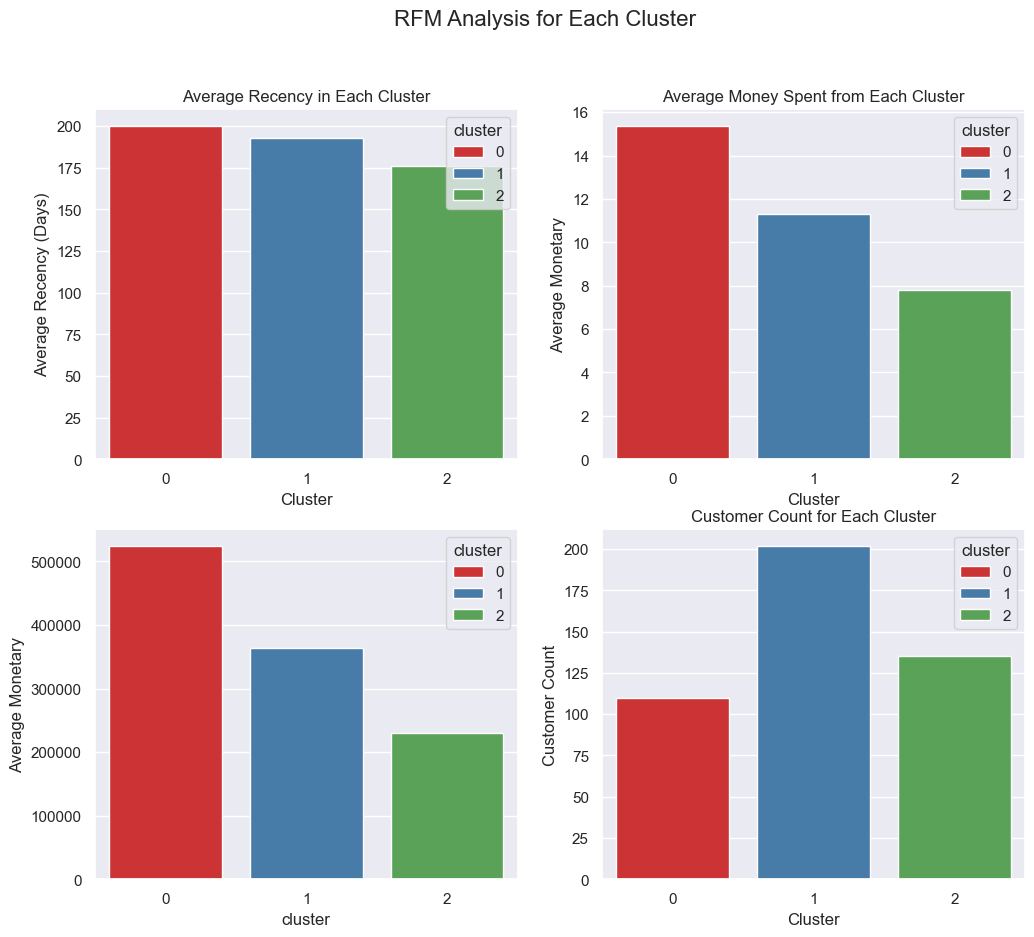

In [24]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize=(12, 10))

#Plot Average Recency for Each Cluster
sns.barplot(x='cluster', y='Average Recency', data= rfm_analysis, hue='cluster', palette='Set1', dodge=False, ax=axes[0, 0])
axes[0,0].set_title('Average Recency in Each Cluster')
axes[0,0].set_xlabel('Cluster')
axes[0,0].set_ylabel('Average Recency (Days)')

#Plot Average Frequency for Each Cluster
sns.barplot(x='cluster', y='Average Frequency', data= rfm_analysis, hue='cluster', palette='Set1', dodge=False, ax=axes[0, 1])
axes[0,1].set_title('Average Frequency in Each Cluster')
axes[0,1].set_xlabel('Cluster')
axes[0,1].set_ylabel('Average Frequency')

#Plot Average Money Spent from Each Cluster
sns.barplot(x='cluster', y='Average Monetary', data= rfm_analysis, hue='cluster', palette='Set1', dodge=False, ax=axes[1, 0])
axes[0,1].set_title('Average Money Spent from Each Cluster')
axes[0,1].set_xlabel('Cluster')
axes[0,1].set_ylabel('Average Monetary')

# Plot Customer Count per Cluster
sns.barplot(x='cluster', y='Number of Customers', data=rfm_analysis, hue='cluster', palette='Set1', dodge=False, ax=axes[1, 1])
axes[1, 1].set_title('Customer Count for Each Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Customer Count')


fig.suptitle('RFM Analysis for Each Cluster', fontsize=16)


#  Summary

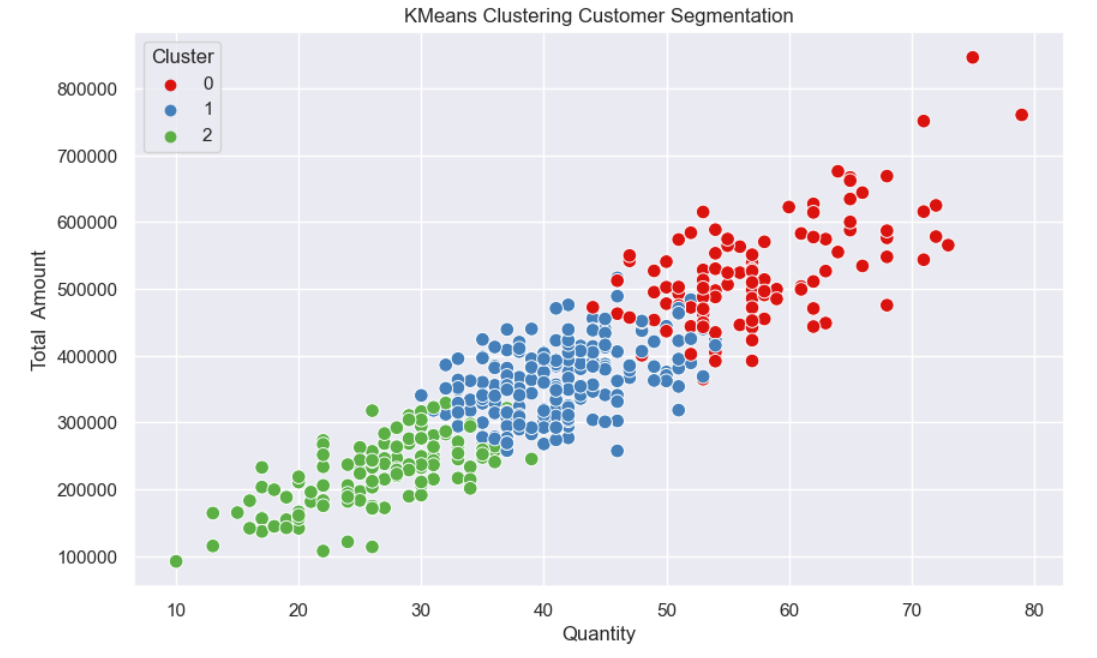

Based on the segementation above, we can divide the customers into 3 clusters:

1. **Cluster 0** is loyal customers
2. **Cluster 1** is emerging customers who still can be converted to loyal customers
3. **Cluster 2** is new customers

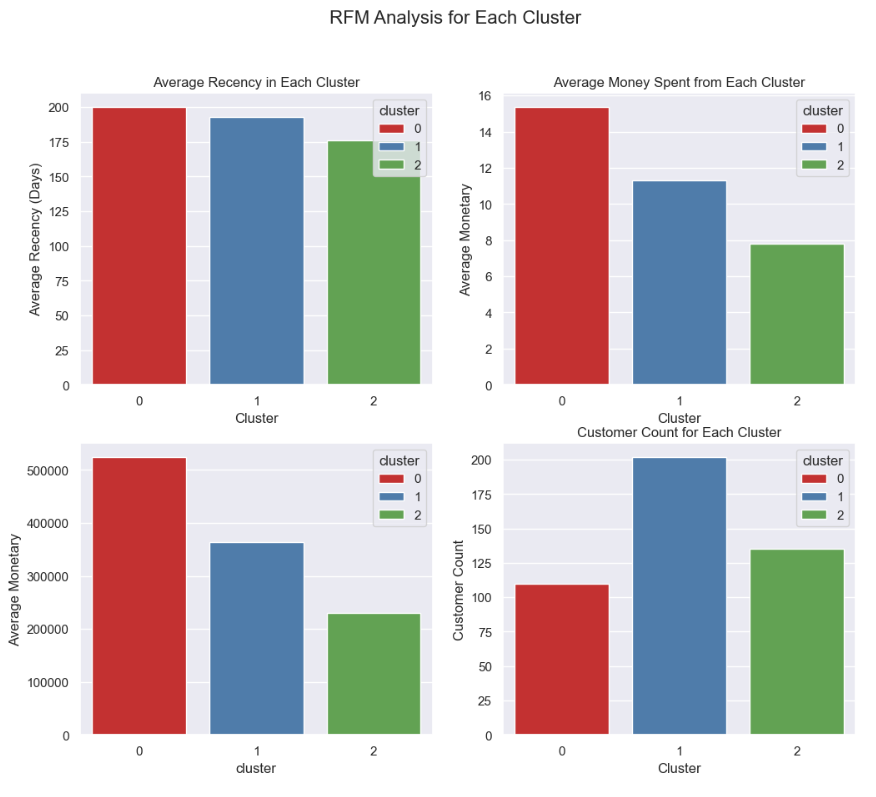

From RFM analysis above, we can conclude that:

**Cluster 0** : The customers in this cluster is our most valuable customers. These customers are best targeted with loyalty programs or other exclusive programs to maintain their loyalty. Some of the strategies we can use to maintain the customers in this cluster are:
- Exclusive events every once in a while (Gala Dinner, Networking Event, etc)
- Give Loyalty Membership
- Early access to new products

**Cluster 1**: Most of our customers are in this cluster. The customers in this cluster are the ones who have the potential to become our loyal customers. Some of the strategies we can use to persuade them to spend more often with us are:
- Special discount with minimum spending
- Loyalty Points
- Product Bundle

**Cluster 2**: Customers in this cluster are customers who might still be new to our products. A few promotion method to encourage them to spend more are:
- Customized Welcome Offers
- Product Samplings or Trials
- Referral Discounts